# THE CLIMATE CHANGE :  Clustering 


###### The  k-means clustering using scikit-learn was performed on the climate dataset 

### Importing the Necessary Libraries

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline

### Importing Dataset 


In [57]:
data = pd.read_csv("C:\dataset\weather.csv")

* **rowID:** 	unique number for each row	(*Unit: NA*)
* **hpwren_timestamp:**	timestamp of measure	(*Unit: year-month-day hour:minute:second*)
* **air_pressure:** air pressure measured at the timestamp	(*Unit: hectopascals*)
* **air_temp:**	air temperature measure at the timestamp	(*Unit: degrees Fahrenheit*)
* **avg_wind_direction:**	wind direction averaged over the minute before the timestamp	(*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **avg_wind_speed:**	wind speed averaged over the minute before the timestamp	(*Unit: meters per second*)
* **max_wind_direction:**	highest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed:**	highest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **min_wind_direction:**	smallest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and inceasing clockwise*)
* **min_wind_speed:**	smallest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **rain_accumulation:**	amount of accumulated rain measured at the timestamp	(*Unit: millimeters*)
* **rain_duration:**	length of time rain has fallen as measured at the timestamp	(*Unit: seconds*)
* **relative_humidity:**	relative humidity measured at the timestamp	(*Unit: percent*)

In [58]:
data.shape

(1587257, 13)

In [59]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Data Sampling<br></p>

Lots of rows, so let us sample down by taking every 10th row. <br>


In [60]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Statistics
<br><br></p>


In [62]:
sampled_df.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587260e+05,158726.000000,158726.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158725.000000,158725.000000,158726.000000
mean,7.936250e+05,916.830161,61.851589,162.156100,2.775215,163.462144,3.400558,166.774017,2.134664,0.000318,0.409627,47.609470
std,4.582039e+05,3.051717,11.833569,95.278201,2.057624,92.452139,2.418802,97.441109,1.742113,0.011236,8.665523,26.214409
min,0.000000e+00,905.000000,31.640000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.900000
25%,3.968125e+05,914.800000,52.700000,62.000000,1.300000,68.000000,1.600000,76.000000,0.800000,0.000000,0.000000,24.700000
50%,7.936250e+05,916.700000,62.240000,182.000000,2.200000,187.000000,2.700000,180.000000,1.600000,0.000000,0.000000,44.700000
75%,1.190438e+06,918.700000,70.880000,217.000000,3.800000,223.000000,4.600000,212.000000,3.000000,0.000000,0.000000,68.000000
max,1.587250e+06,929.500000,99.500000,359.000000,31.900000,359.000000,36.000000,359.000000,31.600000,3.120000,2960.000000,93.000000


In [63]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [64]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Drop all the Rows with Empty rain_duration and rain_accumulation
<br><br></p>


In [65]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [66]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

######  How many rows did we drop ?

In [67]:
rows_before - rows_after

46

In [68]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

###### Select Features of Interest for Clustering



In [69]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [82]:
select_df = sampled_df[features]

In [83]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [72]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


###### Scale the Features using StandardScaler


In [73]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

###### Use k-Means Clustering

In [74]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=12)


###### What are the centers of 12 clusters we formed


In [75]:
centers = model.cluster_centers_
centers

array([[ 1.36790158, -0.08166458, -1.2053249 , -0.05330448, -1.07385743,
        -0.03316255, -0.97765202],
       [-0.20816662,  0.63339374,  0.40874328,  0.73433799,  0.5169657 ,
         0.67238155, -0.15353653],
       [-0.72479146,  0.51168272,  0.17198136, -0.58221736,  0.34132973,
        -0.59553755, -0.08788309],
       [ 0.25205875, -0.99691268,  0.65841244, -0.54660573,  0.8487447 ,
        -0.52924879,  1.15827331],
       [-0.1637793 ,  0.86321727, -1.31178008, -0.58946825, -1.16778555,
        -0.60476155, -0.64115273],
       [-1.18311265, -0.8701715 ,  0.44682583,  1.98317253,  0.53832496,
         1.94419331,  0.90861947],
       [ 0.68709611,  0.48073509,  0.28226125, -0.53919992,  0.46875506,
        -0.54551569, -0.76318829],
       [-0.83557255, -1.20436936,  0.37681947,  0.36994644,  0.47507541,
         0.35775465,  1.36568884],
       [ 0.23422959,  0.32038874,  1.88815273, -0.65179307, -1.55172536,
        -0.57665647, -0.28363417],
       [ 0.06360158, -0.7910

###### Visualization


Let us first create some utility functions which will help us in plotting graphs:

In [76]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [77]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [78]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,1.367902,-0.081665,-1.205325,-0.053304,-1.073857,-0.033163,-0.977652,0
1,-0.208167,0.633394,0.408743,0.734338,0.516966,0.672382,-0.153537,1
2,-0.724791,0.511683,0.171981,-0.582217,0.341330,-0.595538,-0.087883,2
3,0.252059,-0.996913,0.658412,-0.546606,0.848745,-0.529249,1.158273,3
4,-0.163779,0.863217,-1.311780,-0.589468,-1.167786,-0.604762,-0.641153,4
5,-1.183113,-0.870172,0.446826,1.983173,0.538325,1.944193,0.908619,5
6,0.687096,0.480735,0.282261,-0.539200,0.468755,-0.545516,-0.763188,6
7,-0.835573,-1.204369,0.376819,0.369946,0.475075,0.357755,1.365689,7
8,0.234230,0.320389,1.888153,-0.651793,-1.551725,-0.576656,-0.283634,8
9,0.063602,-0.791070,-1.198651,-0.570364,-1.044741,-0.584948,0.880139,9


# Dry Days

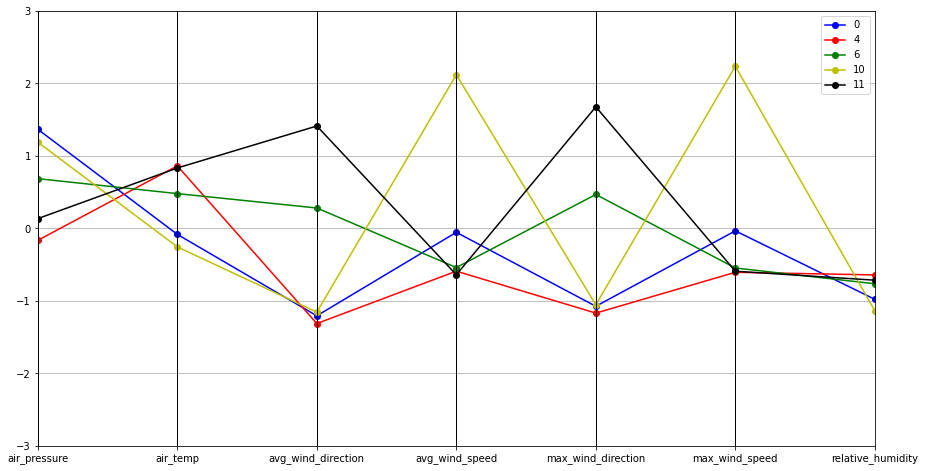

In [79]:
parallel_plot(P[P['relative_humidity'] < -0.5])

# Warm Days

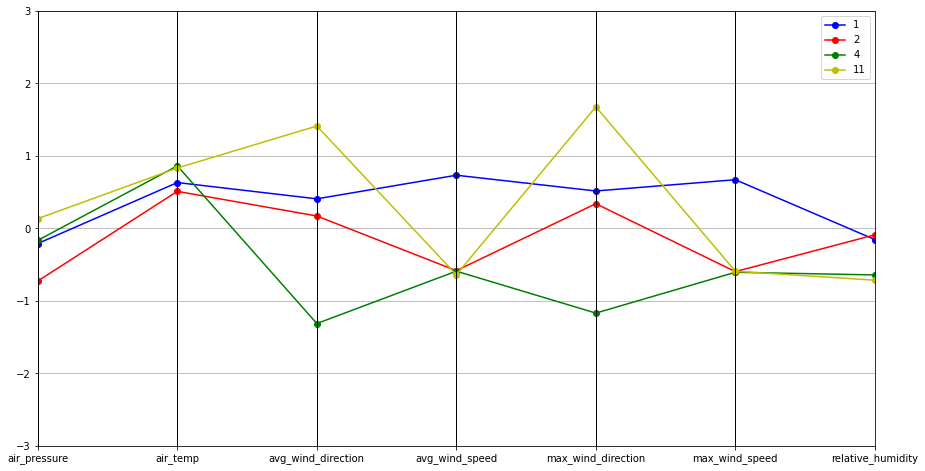

In [80]:
parallel_plot(P[P['air_temp'] > 0.5])

# Cool Days

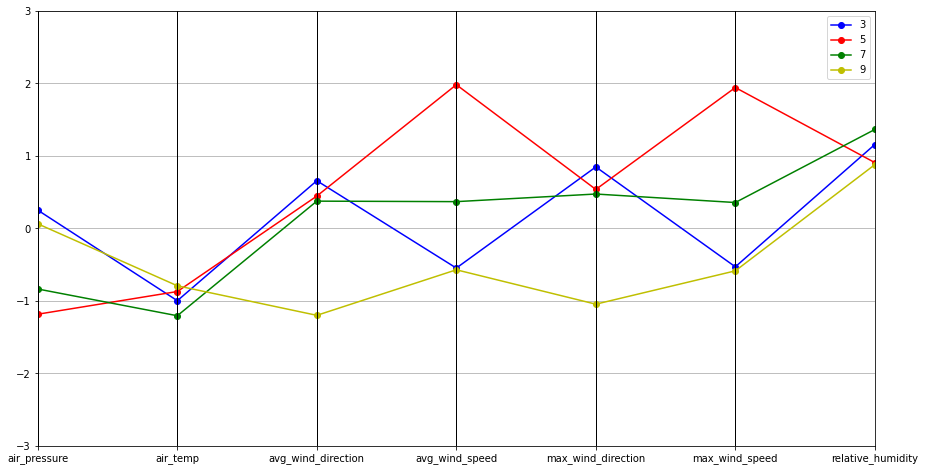

In [81]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])